In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking for null values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

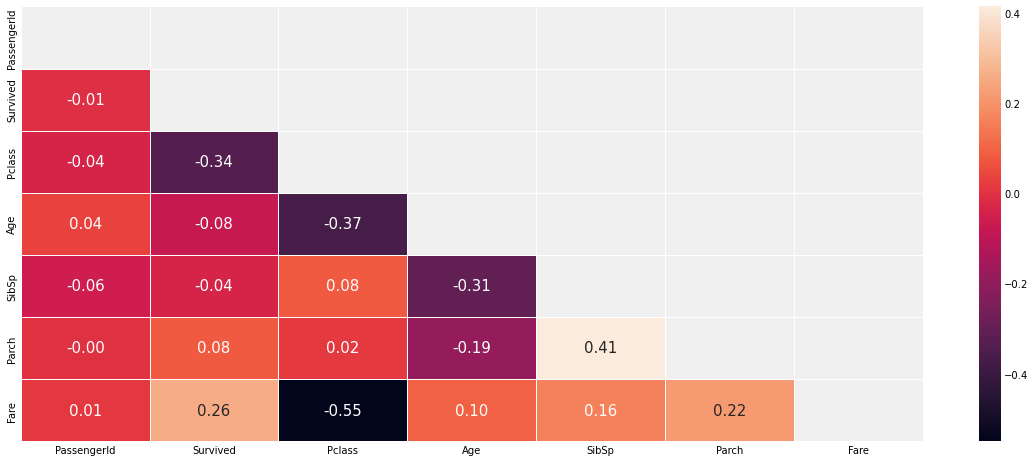

In [8]:
# heatmap

plt.figure(figsize = (18, 8))

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Heatmap is not useful in case of categorical variables, so we will analyse each column to check how each column is contributing in prediction.</strong></p> 


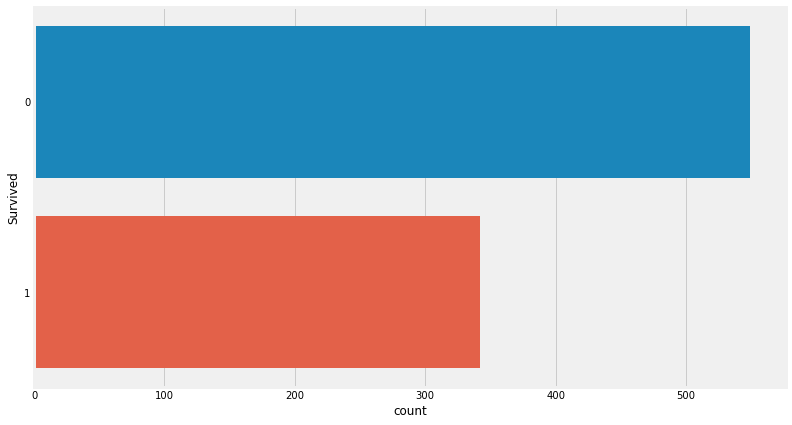

In [9]:
plt.figure(figsize = (12, 7))

sns.countplot(y = 'Survived', data = train_df)
plt.show()

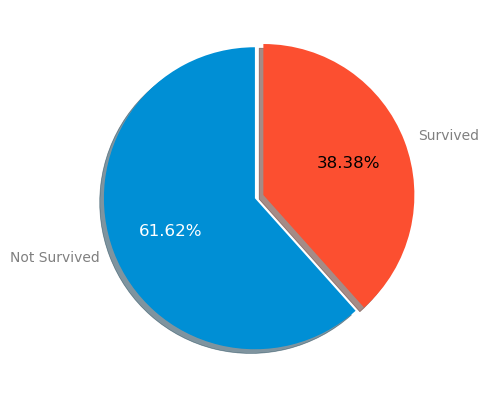

In [10]:
values = train_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

<a id = '2.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Pclass Column</strong></p> 

In [11]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

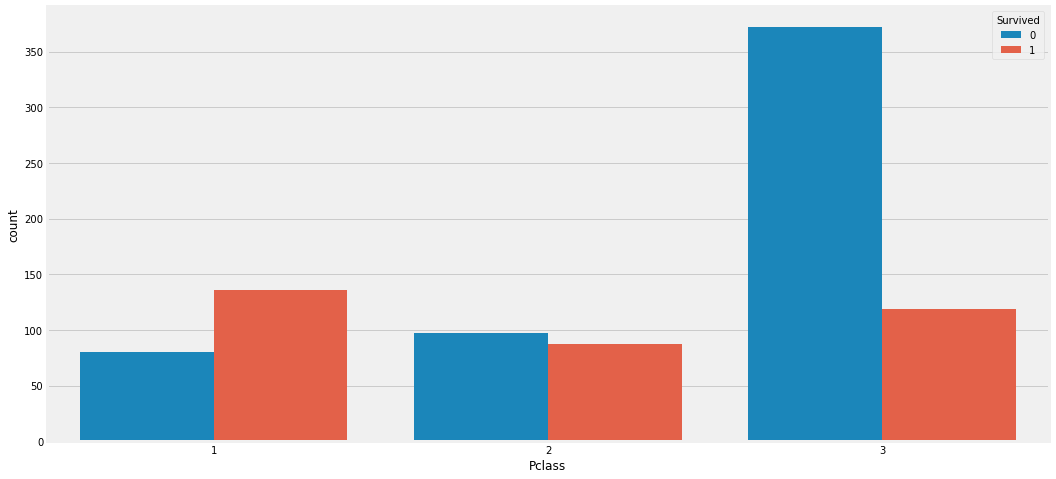

In [13]:
plt.figure(figsize = (16, 8))

sns.countplot('Pclass', hue = 'Survived', data = train_df)
plt.show()

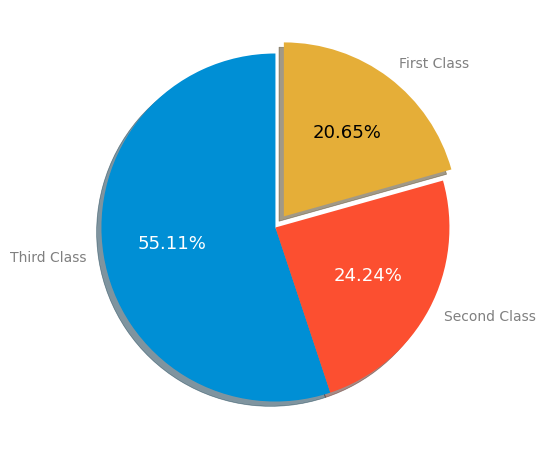

In [14]:
values = train_df['Pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 6), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

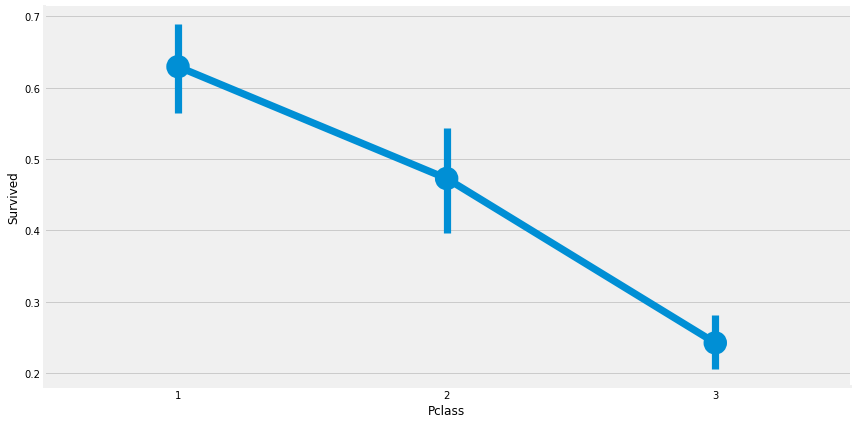

In [15]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Name Column</strong></p> 

In [16]:
train_df.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [17]:
len(train_df.Name.unique()), train_df.shape

(891, (891, 12))

<a id = '2.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Sex Column</strong></p> 

In [18]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

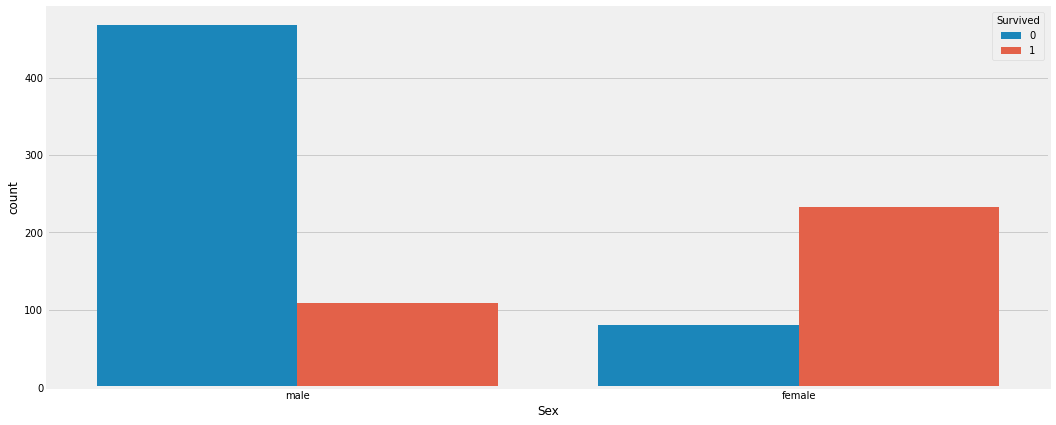

In [20]:
plt.figure(figsize = (16, 7))

sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.show()

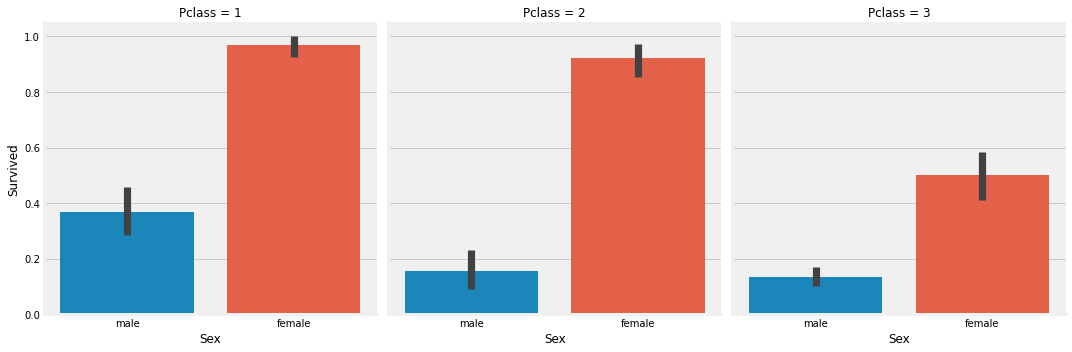

In [21]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'bar', col = 'Pclass')
plt.show()

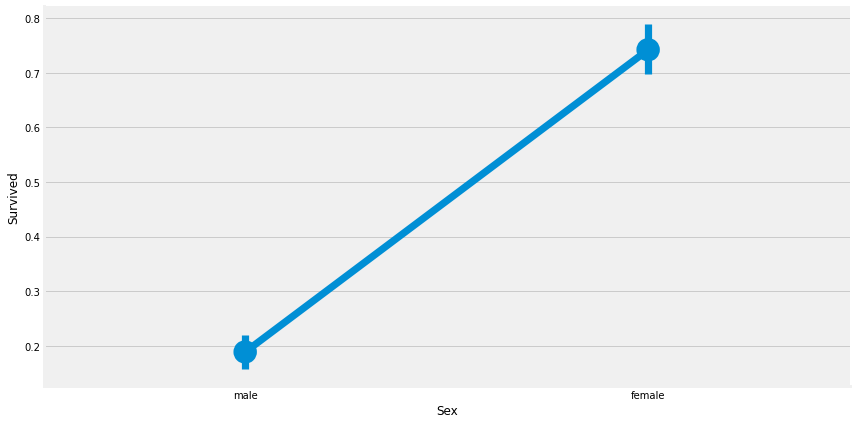

In [22]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'point', height = 6, aspect =2)
plt.show()

<Figure size 1080x432 with 0 Axes>

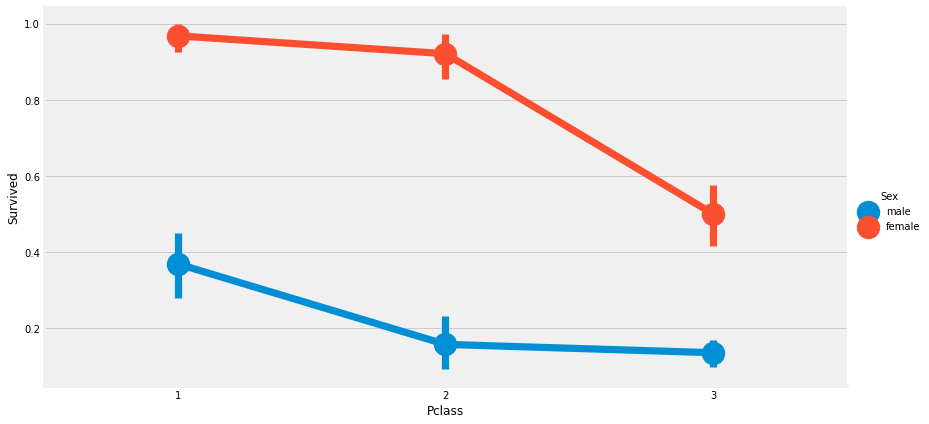

In [23]:
plt.figure(figsize = (15, 6))

sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = train_df, hue = 'Sex', height = 6, aspect = 2)
plt.show()

<a id = '2.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Age Column</strong></p> 

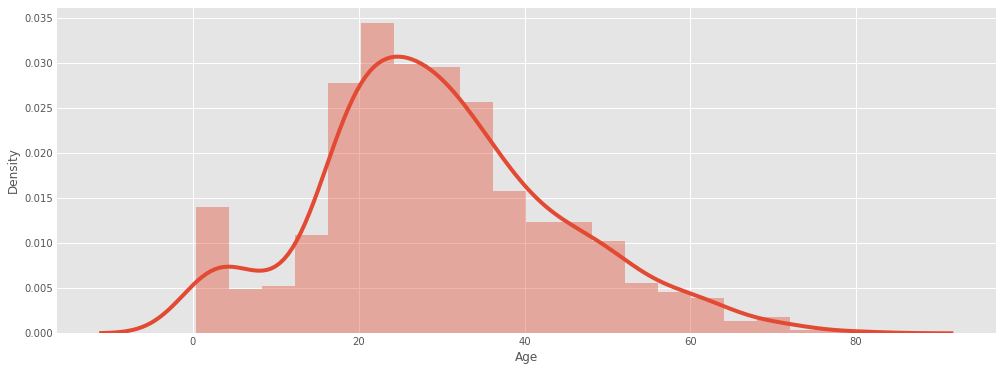

In [24]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(train_df['Age'])
plt.show()

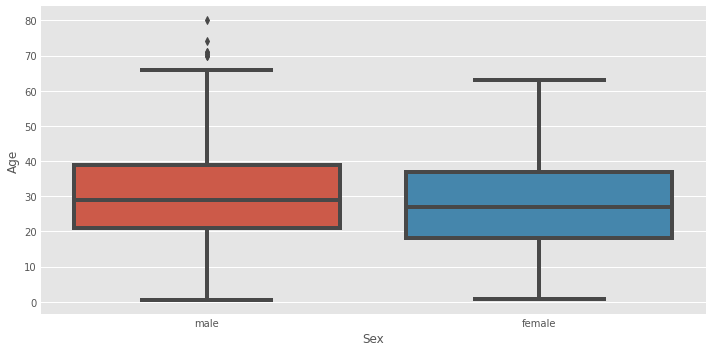

In [25]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.show()

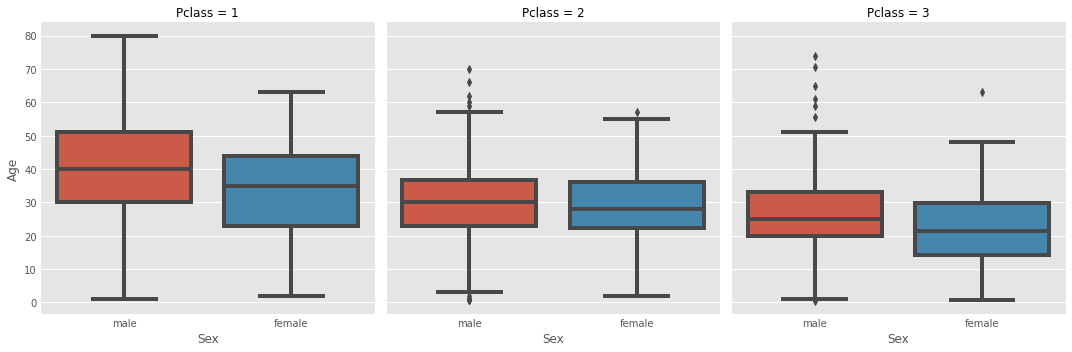

In [26]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, col = 'Pclass')
plt.show()

<a id = '2.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Fare Column</strong></p> 

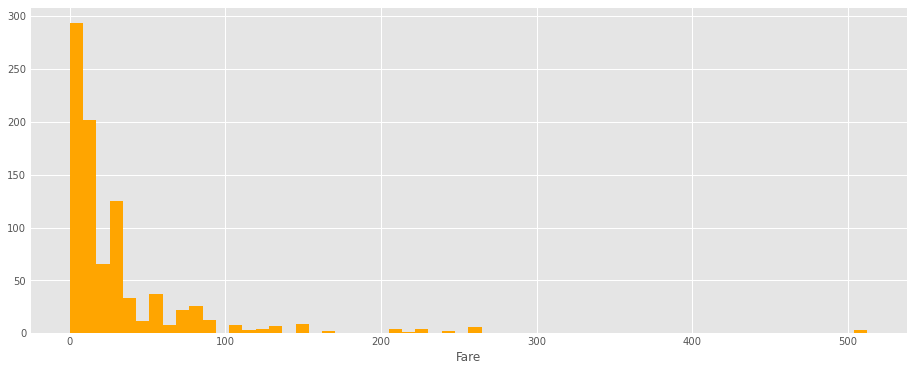

In [27]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>We can see that lot of zero values are there in Fare column so we will replace zero values with mean value of Fare column later.</strong></p> 

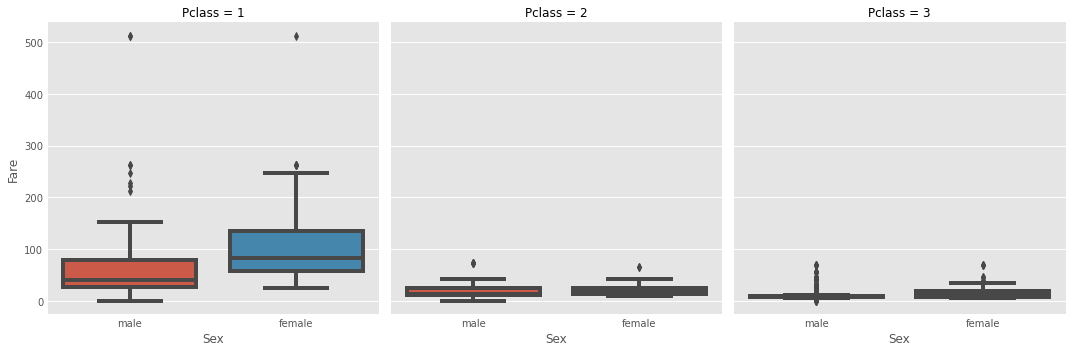

In [28]:
sns.catplot(x = 'Sex', y = 'Fare', data = train_df, kind = 'box', col = 'Pclass')
plt.show()

<a id = '2.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>SibSp Column</strong></p> 

In [29]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

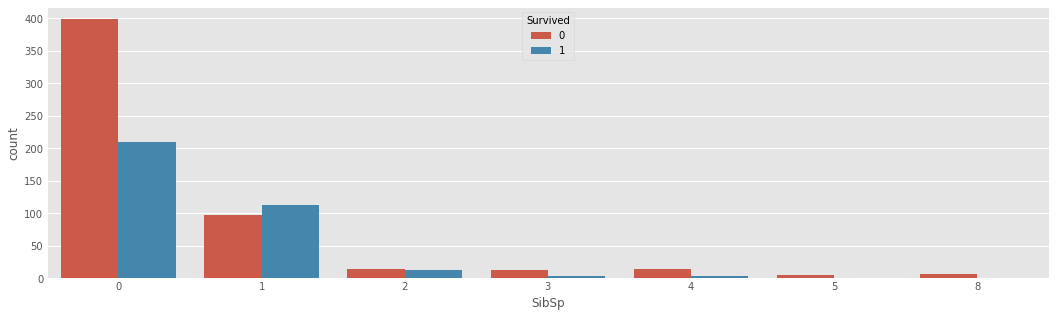

In [30]:
plt.figure(figsize = (16, 5))

sns.countplot(x = 'SibSp', data = train_df, hue = 'Survived')
plt.show()

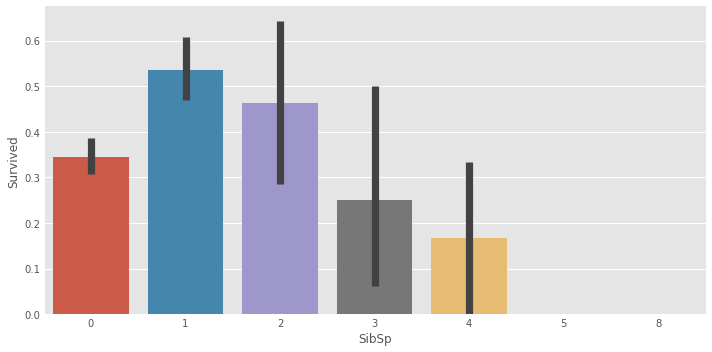

In [31]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = train_df, height = 5, aspect =2)
plt.show()

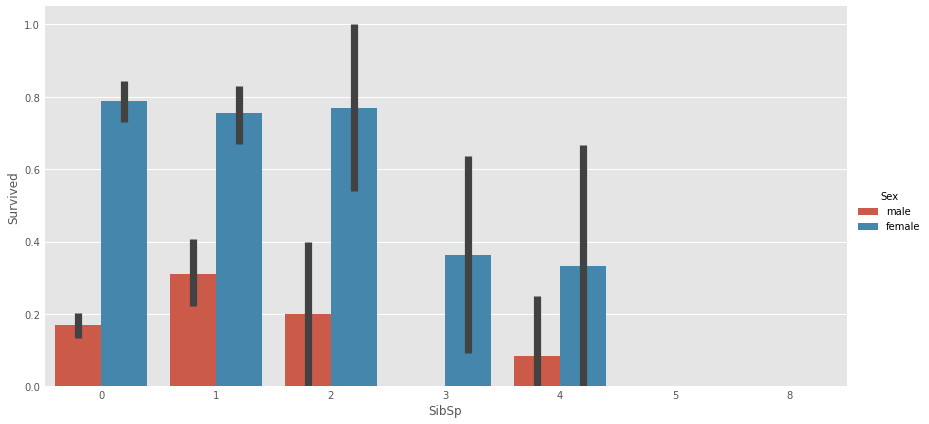

In [32]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

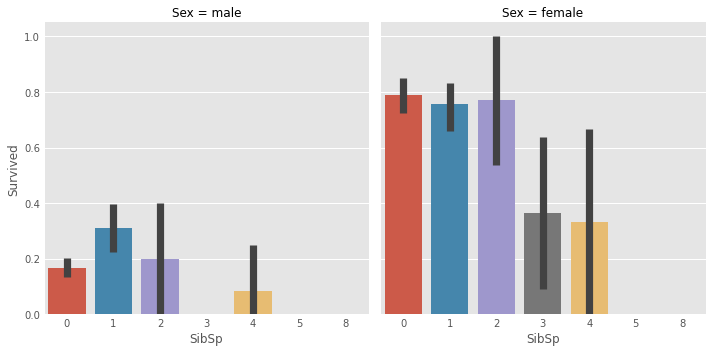

In [33]:
sns.catplot(x = 'SibSp',  y = 'Survived', kind = 'bar', col = 'Sex', data = train_df)
plt.show()

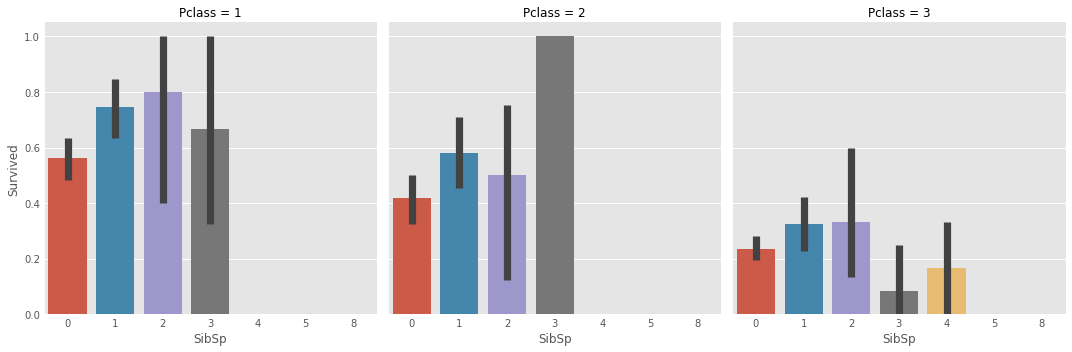

In [34]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train_df)
plt.show()

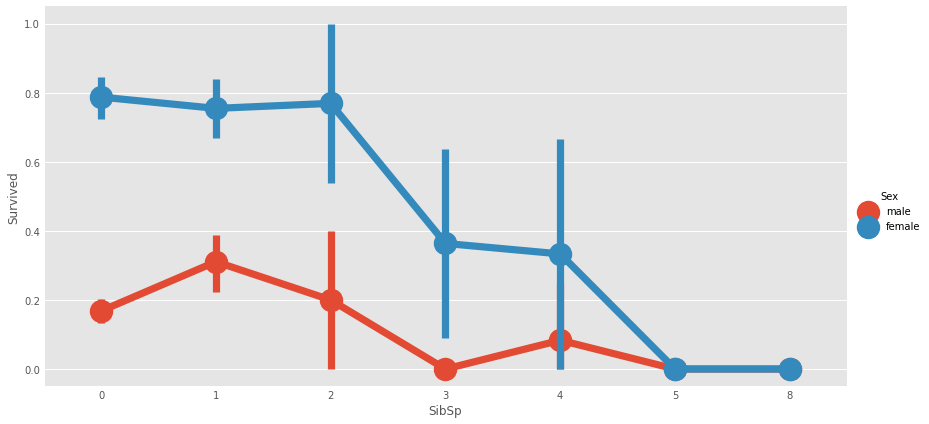

In [35]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'point', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Parch Column</strong></p> 

In [36]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

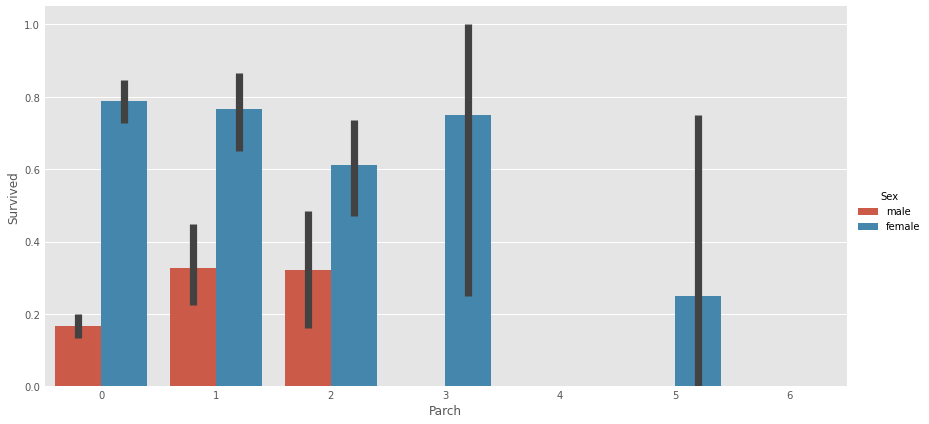

In [37]:
sns.catplot(x = 'Parch', y = 'Survived', data = train_df, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.show()

<a id = '2.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ticket Column</strong></p> 

In [38]:
train_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [39]:
len(train_df.Ticket.unique())

681

<a id = '2.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Embarked Column</strong></p> 

In [40]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

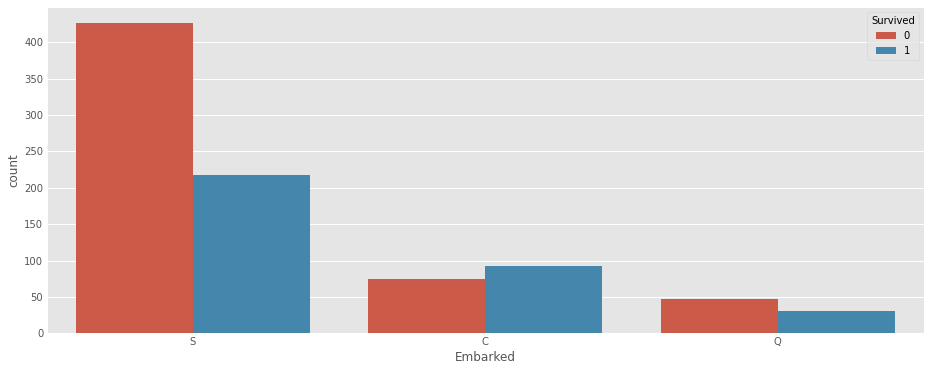

In [41]:
plt.figure(figsize = (14, 6))

sns.countplot('Embarked', hue = 'Survived', data = train_df)
plt.show()

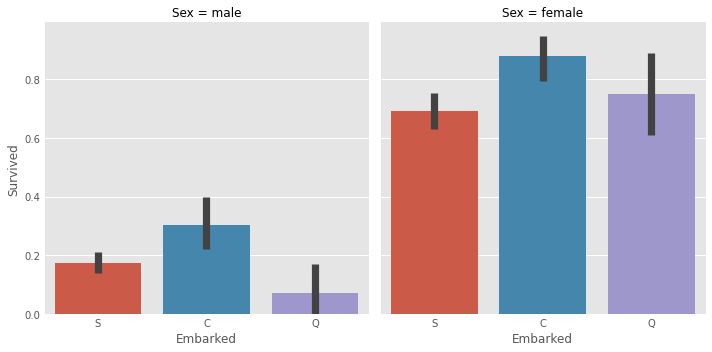

In [42]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train_df, col = 'Sex')
plt.show()

In [43]:
# dropping useless columns

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [46]:
# replacing Zero values of "Fare" column with mean of column

train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].mean())

In [47]:
# filling null values of "Age" column with mean value of the column

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [48]:
# filling null values of "Embarked" column with mode value of the column

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [49]:
# checking for null values after filling null values

train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [50]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [51]:
train_df['Sex'] = train_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [52]:
train_df['Embarked'] = train_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [53]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [54]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [55]:
train_df.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Variance in "Fare" column is very high so we have to normalize these columns.</strong></p> 

In [56]:
train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])

In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


In [58]:
test_df = pd.read_csv('test.csv')

In [59]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# dropping useless columns

test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [61]:
# replacing Zero values of "Fare" column with mean of column

test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].mean())

In [62]:
# filling null values of "Age" column with mean value of the column

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [63]:
# filling null values of "Embarked" column with mode value of the column

test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace = True)

In [64]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [65]:
# filling null values of "Fare" column with mean value of the column

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [66]:
test_df['Sex'] = test_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [67]:
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [68]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [69]:
test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [70]:
test_df.var()

Pclass      0.708690
Sex         0.231960
Age         0.482596
SibSp       0.804178
Parch       0.963203
Fare        0.973274
Embarked    0.469932
dtype: float64

In [71]:
test_df.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [72]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.540959,0,0,2.057860,2
1,3,0,3.850148,1,0,1.945910,0
2,2,1,4.127134,0,0,2.270836,2
3,3,1,3.295837,0,0,2.159003,0
4,3,0,3.091042,1,1,2.508582,0


In [73]:
# creating X and y

X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [74]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [75]:
 X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,3.391117,0,0,2.671269,1
648,3,1,3.391117,0,0,2.021548,0
278,3,1,1.945910,4,1,3.371597,2
31,1,0,3.391117,1,0,4.987167,1
255,3,0,3.367296,0,2,2.724304,1
...,...,...,...,...,...,...,...
263,1,1,3.688879,0,0,3.472097,0
718,3,1,3.391117,0,0,2.740840,2
620,3,1,3.295837,1,0,2.670985,1
786,3,0,2.890372,0,0,2.014343,0


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong> Models</strong></p> 

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Logistic Regression</strong></p> 

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(f"Confusion Matrix :- \n {confusion_matrix(y_test, lr.predict(X_test))}")
print(f"Classification Report : \n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8134328358208955
Confusion Matrix :- 
 [[145  23]
 [ 27  73]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p> 

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9791332263242376
Test Accuracy of Decision Tree Classifier is 0.7798507462686567 

Confusion Matrix :- 
[[141  27]
 [ 32  68]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.72      0.68      0.70       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [78]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 0.9791332263242376
Test Accuracy of Random Forest Classifier is 0.835820895522388 

Confusion Matrix :- 
[[149  19]
 [ 25  75]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       168
           1       0.80      0.75      0.77       100

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



In [79]:
import pickle as pkl
pkl.dump(rd_clf,open('rd_clf_1.pkl','wb'))

In [80]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
857,1,1,3.931826,0,0,3.279030,0
52,1,0,3.891820,1,0,4.340282,1
386,3,1,0.000000,5,2,3.848018,0
124,1,1,3.988984,0,1,4.347532,0
578,3,0,3.391117,1,0,2.671269,1
...,...,...,...,...,...,...,...
835,1,0,3.663562,1,1,4.420746,1
192,3,0,2.944439,1,0,2.061048,0
629,3,1,3.391117,0,0,2.045536,2
559,3,0,3.583519,1,0,2.856470,0


In [81]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,3.391117,0,0,2.671269,1
648,3,1,3.391117,0,0,2.021548,0
278,3,1,1.945910,4,1,3.371597,2
31,1,0,3.391117,1,0,4.987167,1
255,3,0,3.367296,0,2,2.724304,1
...,...,...,...,...,...,...,...
263,1,1,3.688879,0,0,3.472097,0
718,3,1,3.391117,0,0,2.740840,2
620,3,1,3.295837,1,0,2.670985,1
786,3,0,2.890372,0,0,2.014343,0


In [82]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64